In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import brier_score_loss, confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.inspection import permutation_importance
import joblib
import json
import os
from datetime import datetime


# Загрузка данных и первичный анализ

In [3]:
df = pd.read_csv("S06-hw-dataset-04.csv")

In [4]:
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
0,1,-1.250210,1.423474,-0.225004,-4.023138,-0.832729,-0.550874,1.772090,2.761690,-0.698750,...,10.938269,0.501178,1.600001,0.314212,1.209735,1.355697,-5.338924,1.153944,-0.153934,0
1,2,0.074328,0.376429,0.212831,-0.502074,2.017405,0.625496,1.943785,1.242030,-0.524090,...,7.775262,-4.550195,6.272586,-0.932162,-0.228543,1.735220,-3.827828,0.292165,0.273720,0
2,3,0.638481,0.060968,0.746760,2.479653,-0.292858,-0.078139,-2.918423,-0.013186,1.009135,...,-4.448447,-9.593179,-3.093519,0.029321,0.605511,0.829103,-0.085985,2.891408,0.766221,0
3,4,1.712916,-1.350969,-0.256473,1.622074,-0.445141,0.911932,-3.440345,1.505192,-1.104348,...,-1.619072,-3.237479,-5.474038,-1.582475,0.198137,3.823409,0.880395,1.148610,0.136732,0
4,5,0.905676,-0.206545,-0.068806,4.086026,-1.010045,-0.772644,-4.207688,2.506104,1.589143,...,-2.396844,-10.540129,-5.532811,-1.231203,0.000119,4.298572,-1.558235,0.924673,0.111668,0


In [5]:
df.shape

(25000, 62)

In [6]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,-0.000386,-0.004872,0.003202,0.335329,-0.000563,-0.010118,0.001182,0.957385,-0.004658,...,-0.166251,-3.387506,1.749793,-0.013017,-0.001383,0.893365,-0.909479,0.000570,-0.000754,0.04920
std,7217.022701,1.001623,0.995606,1.004367,3.207537,0.993965,1.002172,2.432162,1.830223,1.013470,...,4.234741,4.331576,5.318660,1.001594,0.996409,2.445185,1.962618,0.994320,0.997167,0.21629
min,1.000000,-4.370993,-4.087073,-4.103875,-13.249937,-4.118778,-3.895974,-8.883224,-8.132548,-4.068933,...,-20.021141,-18.332290,-20.336666,-4.349216,-4.119472,-9.508509,-7.919287,-4.038312,-3.812255,0.00000
25%,6250.750000,-0.680165,-0.675100,-0.675426,-1.750048,-0.669764,-0.674374,-1.647977,-0.217260,-0.688278,...,-2.897904,-6.278403,-1.775889,-0.689962,-0.676191,-0.735473,-2.226959,-0.666367,-0.665861,0.00000
50%,12500.500000,0.001859,-0.000247,0.013272,0.403483,-0.001309,-0.005994,-0.011349,0.963009,0.000414,...,-0.396946,-3.462072,1.931851,-0.020933,-0.004193,0.888535,-0.923354,0.004381,0.002420,0.00000
75%,18750.250000,0.679702,0.659523,0.683437,2.486453,0.672299,0.652629,1.658680,2.167758,0.681040,...,2.344956,-0.578540,5.473886,0.661300,0.673722,2.516790,0.395648,0.666474,0.665918,0.00000
max,25000.000000,4.208888,3.984564,3.793442,15.288250,4.020733,4.279607,9.538525,9.321099,4.261349,...,20.717964,18.818764,20.688069,4.338337,3.902131,11.880651,6.778980,3.834922,4.012639,1.00000


In [7]:
print(f"Пропуски по колонкам: {df.isna().sum().sum()}")
print("Какие дубликаты:")
df[df.duplicated()==True]

Пропуски по колонкам: 0
Какие дубликаты:


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

In [9]:
print("Доли классов")
df['target'].value_counts(normalize=True)

Доли классов


0    0.9508
1    0.0492
Name: target, dtype: float64

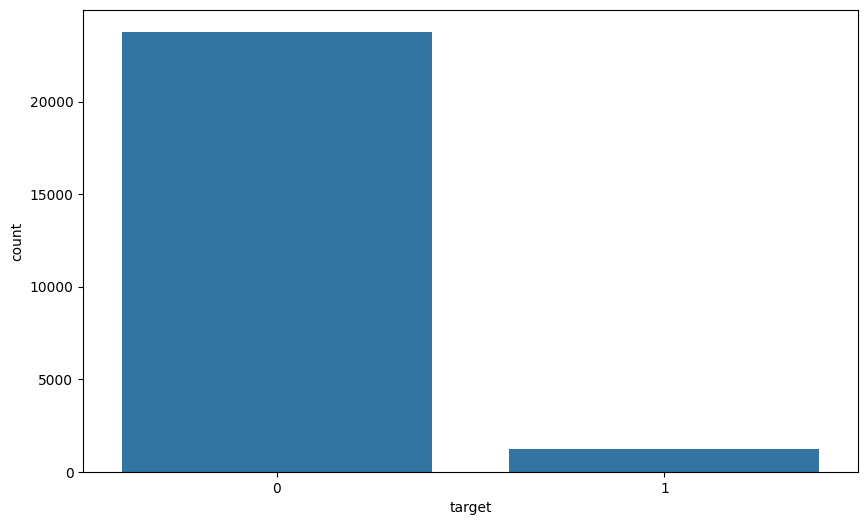

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x = df['target']) 
plt.savefig("artifacts/figures/hist.png")
plt.show()

In [10]:
X = df.drop(columns=['target', 'id'])
y = df['target']
print(X.shape)
print(y.shape)

X.head(), y.head()


(25000, 60)
(25000,)


(        f01       f02       f03       f04       f05       f06       f07  \
 0 -1.250210  1.423474 -0.225004 -4.023138 -0.832729 -0.550874  1.772090   
 1  0.074328  0.376429  0.212831 -0.502074  2.017405  0.625496  1.943785   
 2  0.638481  0.060968  0.746760  2.479653 -0.292858 -0.078139 -2.918423   
 3  1.712916 -1.350969 -0.256473  1.622074 -0.445141  0.911932 -3.440345   
 4  0.905676 -0.206545 -0.068806  4.086026 -1.010045 -0.772644 -4.207688   
 
         f08       f09       f10  ...       f51        f52        f53  \
 0  2.761690 -0.698750 -1.857165  ...  1.130519  10.938269   0.501178   
 1  1.242030 -0.524090 -0.009307  ... -0.311057   7.775262  -4.550195   
 2 -0.013186  1.009135 -4.966481  ... -1.159370  -4.448447  -9.593179   
 3  1.505192 -1.104348  0.291916  ...  0.662697  -1.619072  -3.237479   
 4  2.506104  1.589143 -0.849466  ...  1.245923  -2.396844 -10.540129   
 
         f54       f55       f56       f57       f58       f59       f60  
 0  1.600001  0.314212  1.2

# Подготовка датасета

In [13]:
df = df.drop("id", axis=1)
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42,
)

Фиксированный seed  чтобы результаты были воспроизводимыми.
Стратификация  чтобы при сильном дисбалансе сохранить доли классов в train и test, иначе оценка модели будет некорректной.


## Метрики

In [26]:
def metrics(y_true, y_pred, y_proba=None, title=None):
    if title is not None:
        print(f"{title}: качество на test ")

    print("Classification report:")
    print(classification_report(y_true, y_pred))
    #ROC-AUC (если переданы вероятности)
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC: {auc:.4f}")
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()


In [36]:
def PR_ROC(dummyclf, model, X_test, y_test, title="model"):
    models = [
        ("baseline", dummyclf, "black", "--"),
        (title, model, None, None),
    ]

    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    ax_roc, ax_pr = axes

    ax_roc.set_title("ROC")
    ax_pr.set_title("PR")

    for ax in axes:
        ax.grid(True, linestyle="--")

    for name, clf, color, linestyle in models:
        # ROC-кривая
        RocCurveDisplay.from_estimator(
            clf,
            X_test,
            y_test,
            ax=ax_roc,
            name=name,
            color=color,
            linestyle=linestyle
        )
        # PR-кривая
        PrecisionRecallDisplay.from_estimator(
            clf,
            X_test,
            y_test,
            ax=ax_pr,
            name=name,
            color=color,
            linestyle=linestyle
        )

    fig.tight_layout()
    fig.savefig(f"artifacts/figures/rocstonePR_{title}.png")
    plt.show()


# Обучение моделей

## baseline модели

In [93]:
logreg = LogisticRegression(
            l1_ratio=0, 
            C=1.0,
            solver="liblinear",
            random_state=42,
            )
dummyclf = DummyClassifier(strategy="stratified", random_state=42,)

In [94]:
dummyclf.fit(X_train, y_train)

logreg.fit(X_train, y_train)

D:\mirea\qa\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(l1_ratio=0, random_state=42, solver='liblinear')

In [95]:
dummyclf_pred = dummyclf.predict(X_test)
dummyclf_proba = dummyclf.predict_proba(X_test)[:,1]

logreg_pred = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)[:,1]

In [27]:
metrics(y_test, dummyclf_pred, dummyclf_proba, title="Dummy Classifier")

Dummy Classifier: качество на test 
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7131
           1       0.05      0.05      0.05       369

    accuracy                           0.91      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.91      0.91      0.91      7500

ROC-AUC: 0.5016
Confusion matrix:
[[6786  345]
 [ 350   19]]



In [82]:
metrics(y_test, logreg_pred, logreg_proba, title="Logistic Regression")

Logistic Regression: качество на test 
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7131
           1       0.91      0.25      0.40       369

    accuracy                           0.96      7500
   macro avg       0.94      0.63      0.69      7500
weighted avg       0.96      0.96      0.95      7500

ROC-AUC: 0.8380
Confusion matrix:
[[7122    9]
 [ 275   94]]



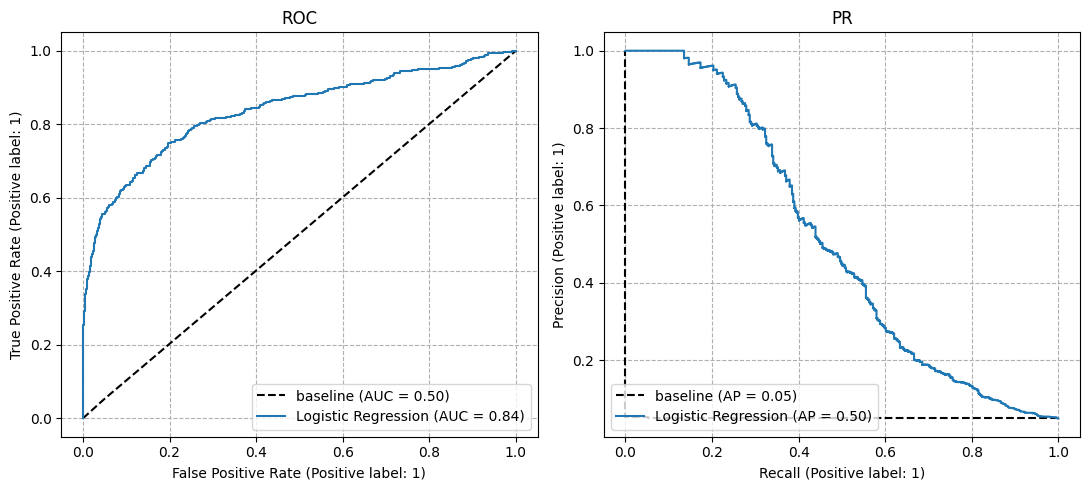

In [54]:
PR_ROC(dummyclf, logreg, X_test,  y_test, title="Logistic Regression")

# Другие модели

## Дерево решений

In [39]:
tree = DecisionTreeClassifier(random_state=42)
#гиперпараметры перебором
param_grid_dt = {
    'max_depth': [5, 7, 10, 13, 15, 20, 25],
    'min_samples_split': [10,15,20],
    'min_samples_leaf': [4,6, 8],
}

grid_search_dt = GridSearchCV(
    estimator=tree,
    param_grid=param_grid_dt,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

In [40]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 13, 15, 20, 25],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [41]:
print(f"Лучшие параметры: {grid_search_dt.best_params_}")
print(f"Лучшая оценка: {grid_search_dt.best_score_:.4f}")

best_dt_model = grid_search_dt.best_estimator_

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшая оценка: 0.9662


In [42]:
dtree_pred = best_dt_model.predict(X_test)
dtree_proba = best_dt_model.predict_proba(X_test)[:,1]

In [43]:
metrics(y_test, dtree_pred, dtree_proba, title="DTree")

DTree: качество на test 
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7131
           1       0.76      0.40      0.53       369

    accuracy                           0.96      7500
   macro avg       0.86      0.70      0.75      7500
weighted avg       0.96      0.96      0.96      7500

ROC-AUC: 0.7715
Confusion matrix:
[[7083   48]
 [ 220  149]]



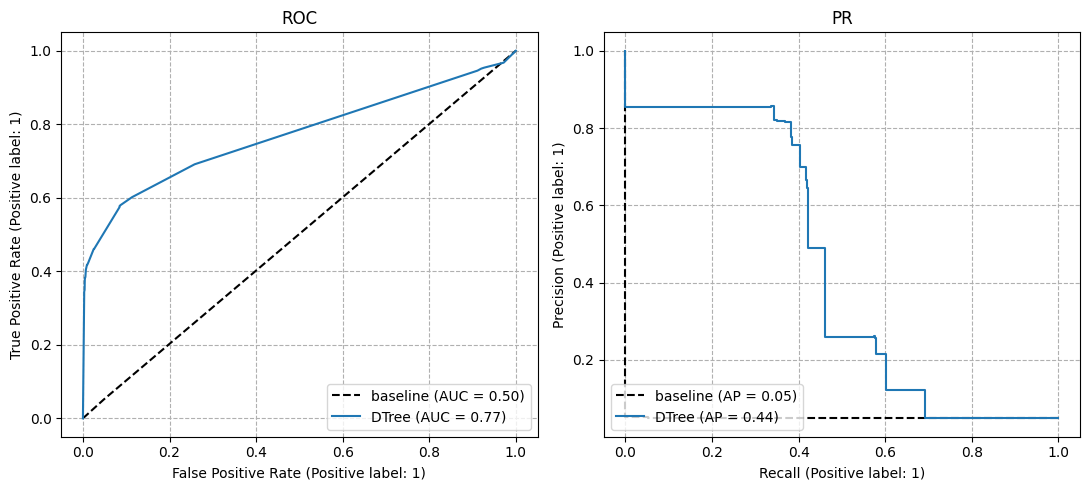

In [44]:
PR_ROC(dummyclf, best_dt_model, X_test,  y_test, title="DTree")

## Случайный лес

In [62]:
rf = RandomForestClassifier(
    random_state=42,
    oob_score=True,
    n_jobs=-1,
    class_weight='balanced'
)

param_grid = {
    "n_estimators":[300, 400, 500, 600],
}

rf_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

In [63]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [300, 400, 500, 600]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [64]:
best_rf_model = rf_search.best_estimator_

print(f"Лучшие параметры {rf_search.best_params_}")
print(f"Лучшая оценка {rf_search.best_score_:.4f}")


Лучшие параметры {'n_estimators': 600}
Лучшая оценка 0.8925


In [65]:
rf_pred = rf_search.best_estimator_.predict(X_test)
rf_proba = rf_search.best_estimator_.predict_proba(X_test)[:,1]

RF: качество на test 
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7131
           1       1.00      0.34      0.51       369

    accuracy                           0.97      7500
   macro avg       0.98      0.67      0.75      7500
weighted avg       0.97      0.97      0.96      7500

ROC-AUC: 0.9008
Confusion matrix:
[[7131    0]
 [ 243  126]]



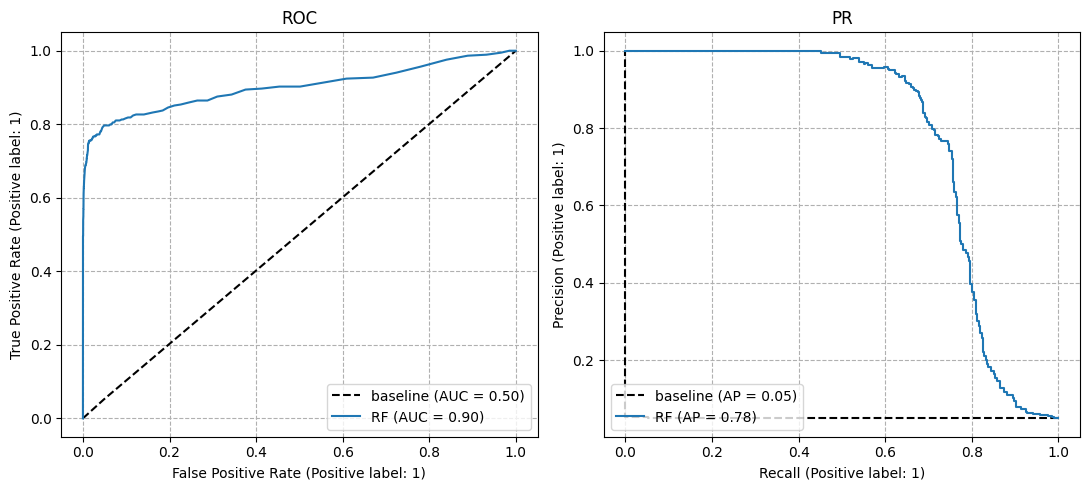

In [66]:
metrics(y_test, rf_pred, rf_proba, title="RF")
PR_ROC(dummyclf, best_rf_model, X_test,  y_test, title="RF")

## Адабуст

In [68]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

ada = AdaBoostClassifier(
    estimator=stump,
    random_state=42
)

param_grid_ada = {
        'estimator': [DecisionTreeClassifier(max_depth=2), 
                      DecisionTreeClassifier(max_depth=3)],
        'n_estimators': [100, 200, 250],
        'learning_rate': [0.5],
                }


grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='roc_auc',  
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

In [69]:
grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.5],
                         'n_estimators': [100, 200, 250]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [71]:
print(f"Лучшие параметры: {grid_search_ada.best_params_}")
print(f"Лучшая оценка : {grid_search_ada.best_score_:.4f}")

Лучшие параметры: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 100}
Лучшая оценка : 0.8517


In [72]:
best_ada_model = grid_search_ada.best_estimator_
ada_pred = best_ada_model.predict(X_test)
ada_proba = best_ada_model.predict_proba(X_test)[:, 1]

ADA: качество на test 
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7131
           1       0.93      0.50      0.65       369

    accuracy                           0.97      7500
   macro avg       0.95      0.75      0.82      7500
weighted avg       0.97      0.97      0.97      7500

ROC-AUC: 0.8762
Confusion matrix:
[[7117   14]
 [ 186  183]]



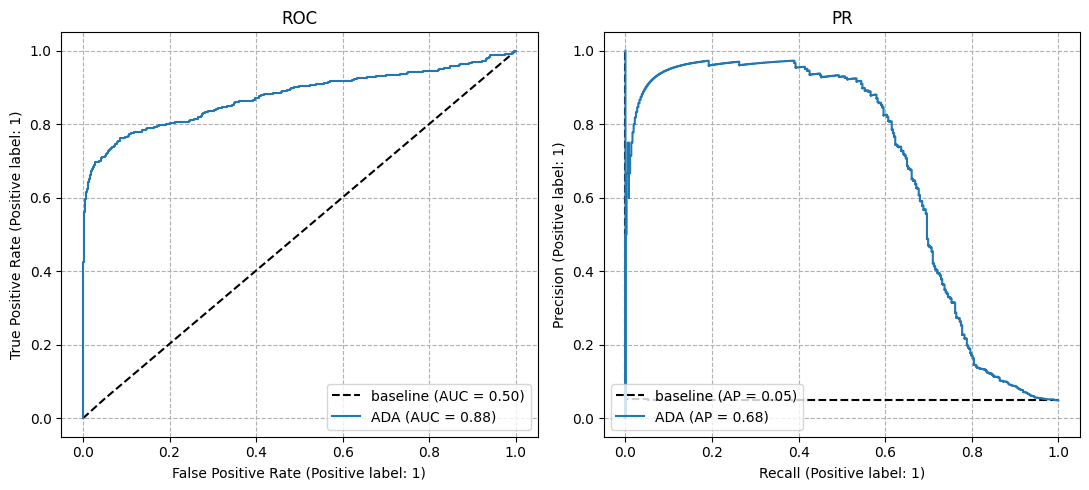

In [73]:
metrics(y_test, ada_pred, ada_proba, title="ADA")
PR_ROC(dummyclf, best_ada_model, X_test,  y_test, title="ADA")

# Оценка моделей
Random Forest показал лучший результат по метрике ROC AUC.Сделаем Permutation Importance.

In [88]:
print("\nВычисление Permutation Importance для лучшей модели")
perm = permutation_importance(
    best_rf_model, X_test, y_test,
    n_repeats=8,
    random_state=42,
    scoring="roc_auc"
)
pimp = perm.importances_mean
idx = np.argsort(pimp)[::-1][:12]


Вычисление Permutation Importance для лучшей модели


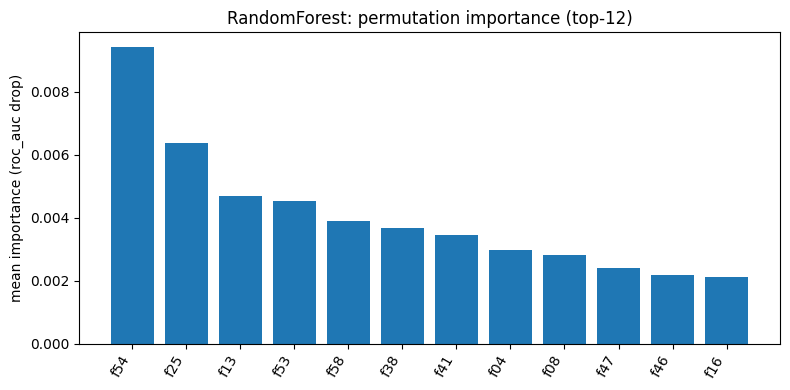

In [102]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(idx)), pimp[idx])
plt.xticks(range(len(idx)), [df.columns[i] for i in idx], rotation=60, ha="right")
plt.ylabel("mean importance (roc_auc drop)")
plt.title("RandomForest: permutation importance (top-12)")
plt.tight_layout()
plt.show()

In [97]:
all_models = {
    'baseline': dummyclf,
    'Logistic Regression': logreg,
    'Decision Tree': grid_search_dt.best_estimator_,
    'Random Forest': rf_search.best_estimator_,
    'AdaBoost': grid_search_ada.best_estimator_
}

results = {}
for model_name, model in all_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics = {
        'accuracy': float(accuracy),
        'precision': float(precision),
        'recall': float(recall),
        'f1': float(f1)
    }

    roc_auc = roc_auc_score(y_test, y_proba)
    metrics['roc_auc'] = float(roc_auc)
    
    # Сохраняем результаты
    results[model_name] = metrics

In [98]:
best_roc_auc = 0
for model_name, metrics in results.items():
    if metrics['roc_auc'] > best_roc_auc:
        best_roc_auc = metrics['roc_auc']
        best_model_name = model_name
best_roc_auc, best_model_name

(0.9008318578487987, 'Random Forest')

In [100]:
metrics_file = "artifacts/metrics_test.json"
with open(metrics_file, 'w') as f:
    json.dump(results, f, indent=2, default=str)
print(f"Метрики сохранены в {metrics_file}")

Метрики сохранены в artifacts/metrics_test.json


In [101]:
best_model = best_rf_model

search_summaries = {
    'DecisionTree': {
        'best_params': grid_search_dt.best_params_,
        'best_cv_score': float(grid_search_dt.best_score_)
    },
    'RandomForest': {
        'best_params': rf_search.best_params_,
        'best_cv_score': float(rf_search.best_score_)
    },
    'AdaBoost': {
        'best_params': grid_search_ada.best_params_,
        'best_cv_score': float(grid_search_ada.best_score_)
    }
}

search_file = "artifacts/search_summaries.json"
with open(search_file, 'w') as f:
    json.dump(search_summaries, f, indent=2, default=str)
print(f"Информация о поиске сохранена в {search_file}")

# 3. Сохраняем лучшую модель
best_model_file = "artifacts/best_model.joblib"
joblib.dump(best_model, best_model_file)
print(f"Лучшая модель сохранена в {best_model_file}")

# 4. Сохраняем метаданные лучшей модели
best_model_meta = {
    'model_name': best_model_name,
    'best_params': str(best_model.get_params()) if hasattr(best_model, 'get_params') else 'N/A',
    'test_metrics': results[best_model_name],
    'timestamp': datetime.now().isoformat(),
    'feature_importances': [df.columns[i] for i in idx]
}

meta_file = "artifacts/best_model_meta.json"
with open(meta_file, 'w') as f:
    json.dump(best_model_meta, f, indent=2, default=str)
print(f"Метаданные модели сохранены в {meta_file}")

Информация о поиске сохранена в artifacts/search_summaries.json
Лучшая модель сохранена в artifacts/best_model.joblib
Метаданные модели сохранены в artifacts/best_model_meta.json


# Выводы

- Устойчивость: что будет, если поменять `random_state`. Метрики остаются стабильными,есть небольшие колебания
- Ошибки: confusion matrix для лучшей модели содержит основную часть ошибок в FN, FP при этом содержит минимум. Модель не переобучена
- Интерпретация: Наибольший вклад дают несколько признаков, остальные вносят меньший вклад

Accuracy непоказательна при дисбалансе классов, поэтому основным критерием сравнения выбран ROC-AUC. 
Одиночные деревья склонны к переобучению, тогда как ансамблевые методы (Random Forest, AdaBoost) дают существенно более стабильное и высокое качество.
Использование валидации исключительно на обучающей выборке необходимо для корректной оценки моделей, при этом интерпретация признаков через permutation importance остаётся применимой и для ансамблей.